In [106]:
%run projection-matrix.py

[[ 0.45827554 -0.29474237 -0.01395746  0.0040258 ]
 [-0.05085589 -0.0545847  -0.54105993 -0.05237592]
 [ 0.10900958  0.17834548 -0.04426782  0.5968205 ]]
Error from normalized data:  0.000168775782172
[[  3.09963996e-03   1.46204548e-04  -4.48497465e-04  -9.78930678e-01]
 [  3.07018252e-04   6.37193664e-04  -2.77356178e-03  -2.04144405e-01]
 [  1.67933533e-06   2.74767684e-06  -6.83964827e-07  -1.32882928e-03]]
Error from not-normalized data:  15.7230455533


In [107]:
data2d = pd.read_csv('data/task12/pts2d-norm-pic_a.txt', header=None).values.astype(np.float)
# print(data2d)

data3d = pd.read_csv('data/task12/pts3d-norm.txt', header=None, sep='   ', engine='python').values.astype(np.float)
# print(data3d)
hom_data2d = np.concatenate((data2d, np.ones(data2d.shape[0])[:,np.newaxis]), axis=1)
hom_data3d = np.concatenate((data3d, np.ones(data2d.shape[0])[:,np.newaxis]), axis=1)

M = projection_matrix(hom_data2d, hom_data3d)
err = compute_error(hom_data2d, hom_data3d, M)
print('Error from normalized data: ', err)

[[ 0.45827554 -0.29474237 -0.01395746  0.0040258 ]
 [-0.05085589 -0.0545847  -0.54105993 -0.05237592]
 [ 0.10900958  0.17834548 -0.04426782  0.5968205 ]]
Error from normalized data:  0.000168775782172


In [108]:
K,R,T,C = decomp_projection_matrix(M)

In [109]:
np.linalg.det(R)

1.0000000000000002

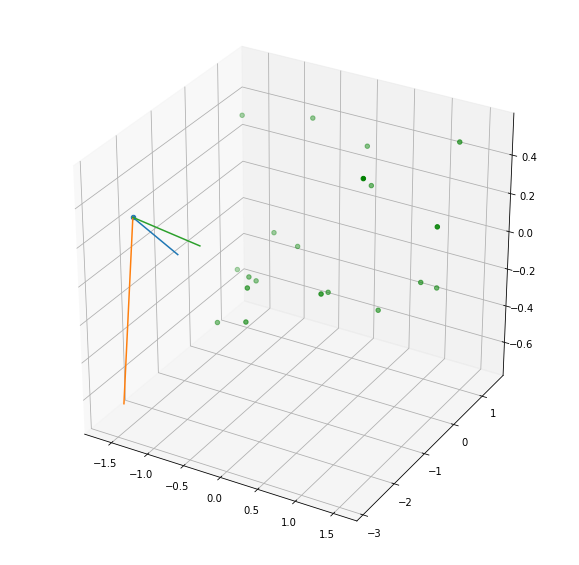

In [110]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data2d[:,0], data2d[:,1], c='r')
# C = T
# R = -R
ax.scatter(data3d[:,0], data3d[:,1], data3d[:,2], c='g')
ax.scatter([C[0]], [C[1]], zs=[C[2]])
ax.plot([C[0]+R[0,0],C[0]],ys=[C[1]+R[0,1],C[1]], zs=[C[2]+R[0,2],C[2]])
ax.plot([C[0]+R[1,0],C[0]],ys=[C[1]+R[1,1],C[1]], zs=[C[2]+R[1,2],C[2]])
ax.plot([C[0]+R[2,0],C[0]],ys=[C[1]+R[2,1],C[1]], zs=[C[2]+R[2,2],C[2]])
